In [1]:
#imporitng dependencies
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score

# EDA

In [2]:
train=pd.read_csv('train_u6lujuX_CVtuZ9i.csv') # reading training data

In [3]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
train.shape

(614, 13)

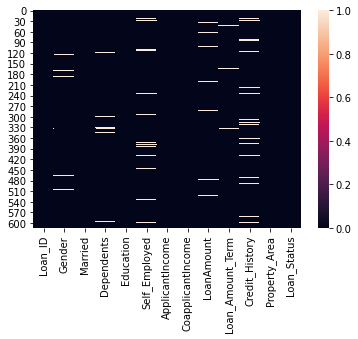

In [5]:
sns.heatmap(train.isnull()) # checking for null values

In [6]:
train.drop(['Loan_ID'],axis=1,inplace=True) # dropping unnecessary column

In [7]:
train.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             601 non-null    object 
 1   Married            611 non-null    object 
 2   Dependents         599 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      582 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         592 non-null    float64
 8   Loan_Amount_Term   600 non-null    float64
 9   Credit_History     564 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 57.7+ KB


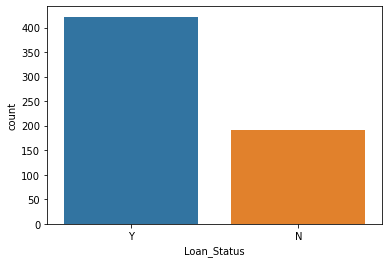

In [9]:
sns.countplot('Loan_Status',data=train)

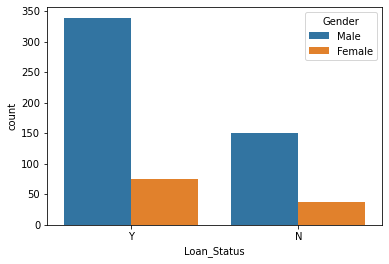

In [10]:
sns.countplot('Loan_Status',data=train,hue='Gender')

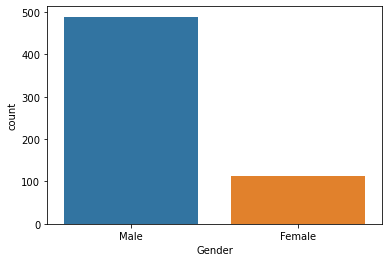

In [11]:
sns.countplot('Gender',data=train)

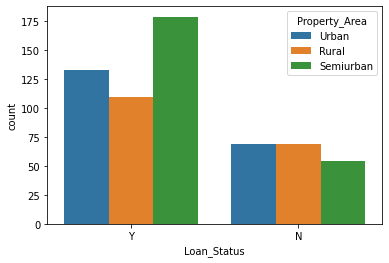

In [12]:
sns.countplot('Loan_Status',data=train,hue='Property_Area')

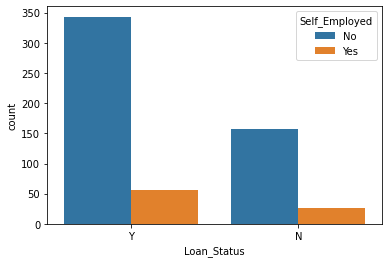

In [13]:
sns.countplot('Loan_Status',data=train,hue='Self_Employed')

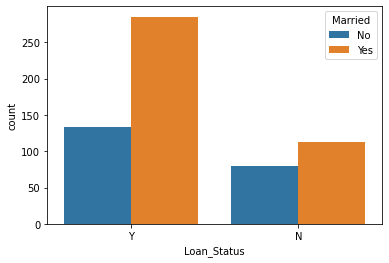

In [14]:
sns.countplot('Loan_Status',data=train,hue='Married')

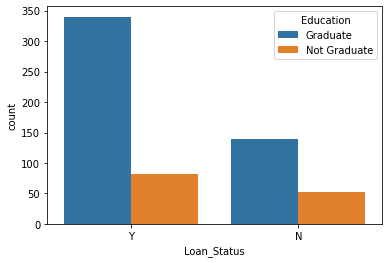

In [15]:
sns.countplot('Loan_Status',data=train,hue='Education')

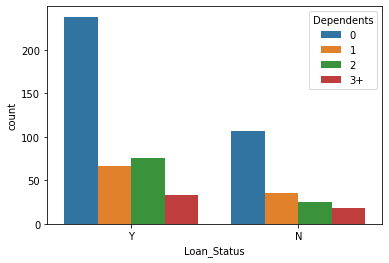

In [16]:
sns.countplot('Loan_Status',data=train,hue='Dependents')

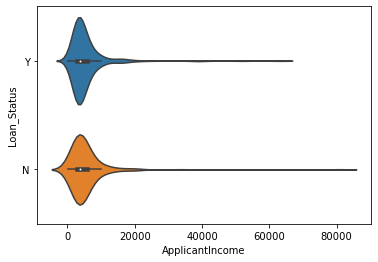

In [17]:
sns.violinplot(y='Loan_Status',x='ApplicantIncome',data=train)

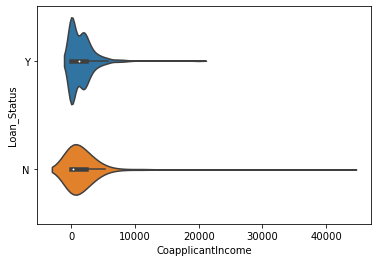

In [18]:
sns.violinplot(y='Loan_Status',x='CoapplicantIncome',data=train)

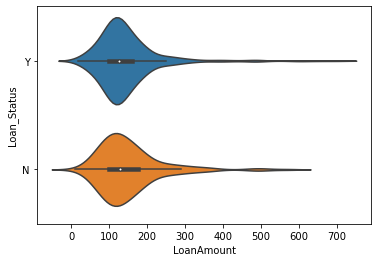

In [19]:
sns.violinplot(y='Loan_Status',x='LoanAmount',data=train)

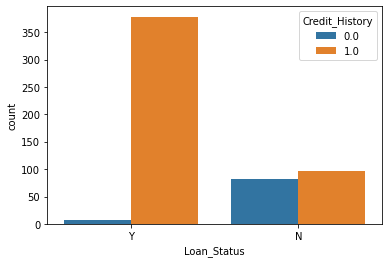

In [20]:
sns.countplot('Loan_Status',data=train,hue='Credit_History')

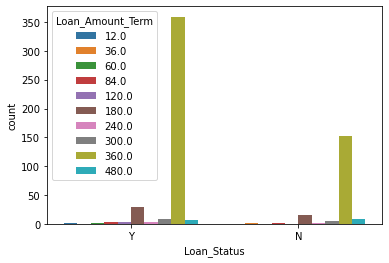

In [21]:
sns.countplot('Loan_Status',data=train,hue='Loan_Amount_Term')

In [22]:
train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [23]:
train.corr()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
ApplicantIncome,1.000000,-0.116605,0.570909,-0.045306,-0.014715
CoapplicantIncome,-0.116605,1.000000,0.188619,-0.059878,-0.002056
LoanAmount,0.570909,0.188619,1.000000,0.039447,-0.008433
Loan_Amount_Term,-0.045306,-0.059878,0.039447,1.000000,0.001470
Credit_History,-0.014715,-0.002056,-0.008433,0.001470,1.000000


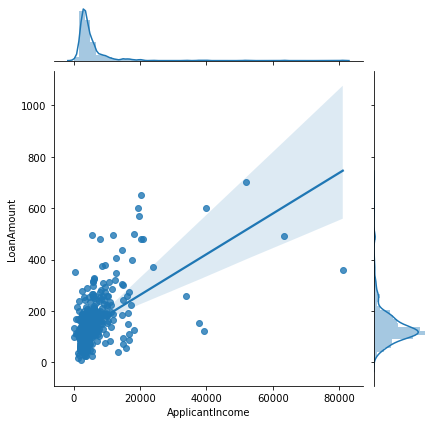

In [24]:
sns.jointplot(x='ApplicantIncome',y='LoanAmount',data=train,kind='reg')

# Feature Engineering and Model Building

In [25]:
train.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [26]:
for i in train.columns: # checking count of unique values in all columns including nan values
    print(train[i].value_counts(dropna=False))

Male      489
Female    112
NaN        13
Name: Gender, dtype: int64
Yes    398
No     213
NaN      3
Name: Married, dtype: int64
0      345
1      102
2      101
3+      51
NaN     15
Name: Dependents, dtype: int64
Graduate        480
Not Graduate    134
Name: Education, dtype: int64
No     500
Yes     82
NaN     32
Name: Self_Employed, dtype: int64
2500    9
4583    6
2600    6
6000    6
5000    5
       ..
5818    1
5819    1
5821    1
2750    1
3691    1
Name: ApplicantIncome, Length: 505, dtype: int64
0.0       273
1666.0      5
2083.0      5
2500.0      5
1750.0      3
         ... 
7166.0      1
2138.0      1
2166.0      1
3541.0      1
3021.0      1
Name: CoapplicantIncome, Length: 287, dtype: int64
NaN      22
120.0    20
110.0    17
100.0    15
160.0    12
         ..
360.0     1
53.0      1
65.0      1
156.0     1
89.0      1
Name: LoanAmount, Length: 204, dtype: int64
360.0    512
180.0     44
480.0     15
NaN       14
300.0     13
84.0       4
240.0      4
120.0      3
36.

In [27]:
train['Gender'].fillna('Male',inplace=True) # filling null values with most common value
train['Married'].fillna('Yes',inplace=True) #  filling null values with most common value
train['Dependents'].fillna('0',inplace=True) #  filling null values with most common value
train['Self_Employed'].fillna('No',inplace=True) #  filling null values with most common value 
train['LoanAmount'].fillna(128,inplace=True) # filling null values with median because loan amount coulmn has outliers
train['Loan_Amount_Term'].fillna(1,inplace=True) #  filling null values with most common value
train['Credit_History'].fillna(1,inplace=True) #  filling null values with most common value

In [28]:
train.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [29]:
train.duplicated().sum() # checking for duplicate rows

0

In [30]:
train.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [31]:
X=train.drop(['Loan_Status'],axis=1) # seprating from target
y=train['Loan_Status']

In [32]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    object 
 1   Married            614 non-null    object 
 2   Dependents         614 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      614 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    float64
 9   Credit_History     614 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 57.7+ KB


In [33]:
le=LabelEncoder() # converting all catagorical variable in numeric values
for i in X.columns:
    if X[i].dtype == 'object':
        X[i]=le.fit_transform(X[i])
X.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,0,0,0,0,5849,0.0,128.0,360.0,1.0,2
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2


In [34]:
X=np.array(X)
y=np.array(y)

In [35]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [36]:
def accuracy_graph(models):
    '''it will take ML models as list and prints model vs accuracy bar plot'''
    modelnames=[]
    accu_racy=[]
    for modelname in models:
        model=modelname
        model.fit(X,y)
        predictions=model.predict(X_test)
        accu_racy.append(accuracy_score(y_test,predictions)*100)
        modelnames.append(str(modelname))
    sns.barplot(y=modelnames,x=accu_racy)

In [37]:
models=[LogisticRegression(solver='liblinear'),DecisionTreeClassifier(),RandomForestClassifier(n_estimators=30)]

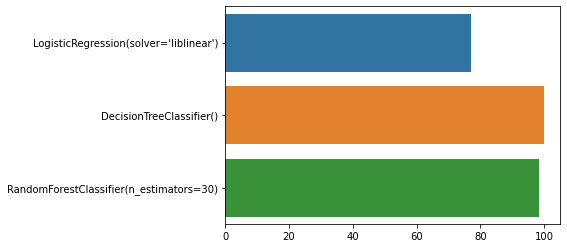

In [38]:
accuracy_graph(models)

In [39]:
model=models[-1]  #final model will be randomforest model

# Predictions for test dataset

In [40]:
test=pd.read_csv('test_Y3wMUE5_7gLdaTN.csv')

In [41]:
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [42]:
test.drop(['Loan_ID'],axis=1,inplace=True)

In [43]:
test.isnull().sum()

Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [44]:
test['Gender'].fillna('Male',inplace=True)
test['Dependents'].fillna('0',inplace=True)
test['Self_Employed'].fillna('No',inplace=True)
test['LoanAmount'].fillna(128,inplace=True)
test['Loan_Amount_Term'].fillna(1,inplace=True) 
test['Credit_History'].fillna(1,inplace=True) 

In [45]:
test.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

In [46]:
test.duplicated().sum()

1

In [47]:
test.drop_duplicates(keep='first',inplace=True)

In [49]:
test.duplicated().sum()

0

In [51]:
test.reset_index(drop=True,inplace=True)

In [52]:
le=LabelEncoder() 
for i in test.columns:
    if test[i].dtype == 'object':
        test[i]=le.fit_transform(test[i])
test.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,1,0,0,0,5720,0,110.0,360.0,1.0,2
1,1,1,1,0,0,3076,1500,126.0,360.0,1.0,2
2,1,1,2,0,0,5000,1800,208.0,360.0,1.0,2
3,1,1,2,0,0,2340,2546,100.0,360.0,1.0,2
4,1,0,0,1,0,3276,0,78.0,360.0,1.0,2


In [53]:
predictions=model.predict(test)

In [56]:
test.shape

(366, 11)

In [62]:
test['Loan_status']=predictions

In [64]:
test.shape

(366, 12)

In [65]:
test.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_status
0,1,1,0,0,0,5720,0,110.0,360.0,1.0,2,Y
1,1,1,1,0,0,3076,1500,126.0,360.0,1.0,2,Y
2,1,1,2,0,0,5000,1800,208.0,360.0,1.0,2,Y
3,1,1,2,0,0,2340,2546,100.0,360.0,1.0,2,Y
4,1,0,0,1,0,3276,0,78.0,360.0,1.0,2,Y


In [66]:
test.to_csv('predictions.csv')